In [79]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [80]:
train = pd.read_csv("SalaryData_Train.csv")
test = pd.read_csv("SalaryData_Test.csv")

# EDA

In [81]:
train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

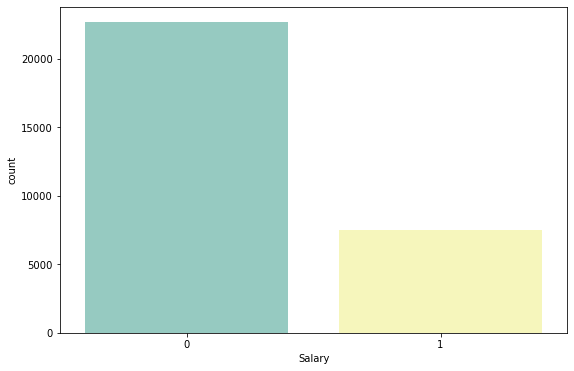

<AxesSubplot:ylabel='Salary'>

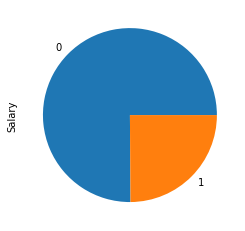

In [109]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='Salary',data=train,palette="Set3")
plt.show()
plt.savefig('count_plot')
fig.add_subplot(1,2,2)
train["Salary"].value_counts(normalize=True).plot.pie()


In [82]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

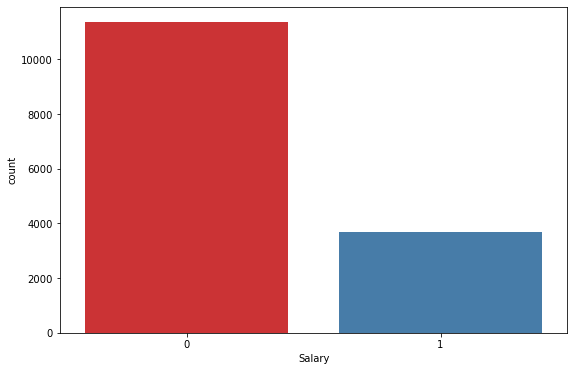

<AxesSubplot:ylabel='Salary'>

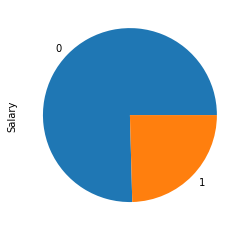

In [112]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='Salary',data=test,palette="Set1")
plt.show()
plt.savefig('count_plot')
fig.add_subplot(1,2,2)
test["Salary"].value_counts(normalize=True).plot.pie()

In [83]:
# finding categorical variables

categorical = [var for var in train.columns if train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)
train[categorical].head()


There are 9 categorical variables

The categorical variables are : ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [84]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [85]:
from sklearn.preprocessing import LabelEncoder
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [86]:
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [87]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [88]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [89]:
X_train = train.iloc[:,0:13].values
y_train = train.iloc[:,13].values
X_test = test.iloc[:,0:13].values
y_test = test.iloc[:,13].values

from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train= min_max_scaler.fit_transform(X_train)
X_test= min_max_scaler.fit_transform(X_test)

In [90]:
from sklearn.naive_bayes import GaussianNB as GB
classifier_gb = GB()
classifier_gb.fit(X_train,y_train)
train_pred_g = classifier_gb.predict(X_train)
accuracy_train_g= np.mean(train_pred_g==y_train)
accuracy_train_g

0.797586286926826

In [91]:
test_pred_g = classifier_gb.predict(X_test)
accuracy_test_g = np.mean(test_pred_g==y_test) 
accuracy_test_g

0.796812749003984

<AxesSubplot:>

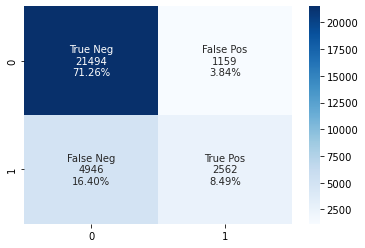

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, train_pred_g)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

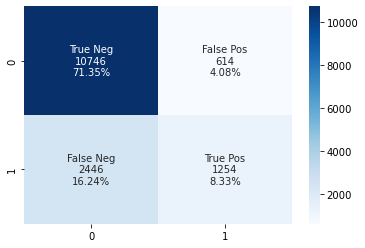

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_g)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')